In [1]:
import pandas as pd
import numpy as np
import os 
import sys 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# File Loading

In [2]:
middle_school_dir = r'D:\index_calculation_ppg\samples\middle_school_dataset.xlsx' 
university_dir = r'D:\index_calculation_ppg\samples\university_dataset.xlsx'
hospital_dir = r'D:\index_calculation_ppg\samples\hospital_dataset.xlsx'

In [3]:
middle_school = pd.read_excel(middle_school_dir, usecols=['HRV_SDNN','HRV_RMSSD', 'HRV_pNN50','wave_quality','id','age','gender'])
university_school = pd.read_excel(university_dir,usecols=['HRV_SDNN','HRV_RMSSD','HRV_pNN50','wave_quality','id','age','gender'])
hospital = pd.read_excel(hospital_dir,usecols=['HRV_SDNN','HRV_RMSSD','HRV_pNN50','wave_quality','id','age','gender'])

# Data Quality Check

<Axes: xlabel='wave_quality', ylabel='Density'>

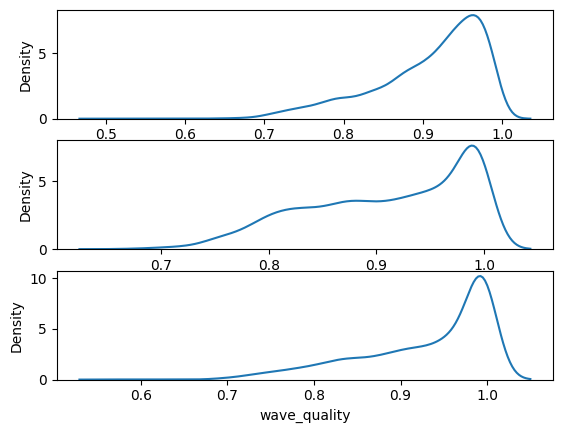

In [4]:
# Middle school analysis
plt.subplot(311)
sns.kdeplot(middle_school['wave_quality'])
plt.subplot(312)
sns.kdeplot(university_school['wave_quality'])
plt.subplot(313)
sns.kdeplot(hospital['wave_quality'])


In [5]:
# Applying wave_quality filter 
wave_quality_filter = 0.8

middle_school = middle_school[middle_school['wave_quality'] >= wave_quality_filter]
university_school = university_school[university_school['wave_quality'] >= wave_quality_filter]
hospital_school = hospital[hospital['wave_quality'] >= wave_quality_filter]

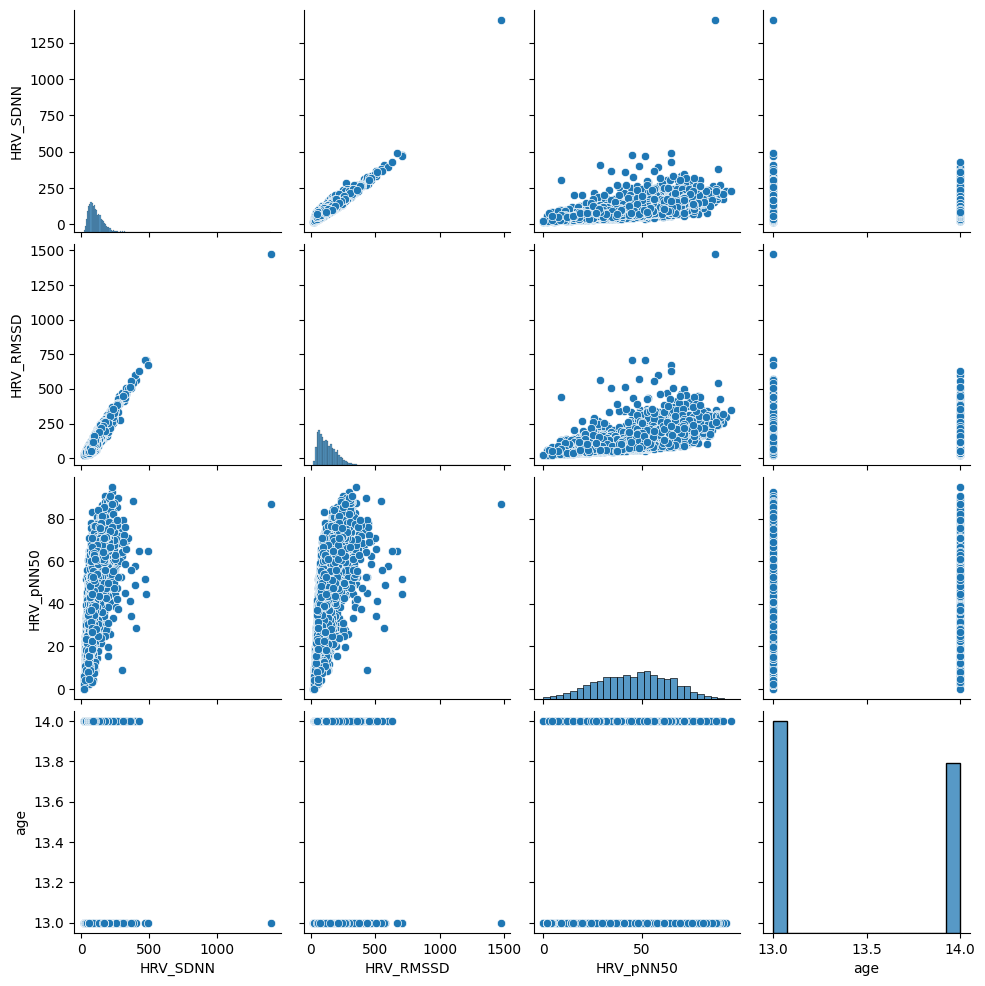

In [6]:
sns.pairplot(middle_school.drop(['id','wave_quality'], axis = 1))

# PREPROCESS FUNCTIONS

In [8]:
def group_function(data_name, name_feature):

    features= data_name[[name_feature, 'id']]
    mean_df = features.groupby('id').mean().reset_index()
    median_df = features.groupby('id').median().reset_index()
    std_df = features.groupby('id').std().reset_index()
    std_df.columns = ['id', name_feature+'_STD']
    mean_df.columns = ['id', name_feature+'_MEAN']
    median_df.columns = ['id', name_feature+'_MEDIAN']
    gender_age_df = data_name[['id', 'gender', 'age']].drop_duplicates()
    final_df = mean_df.merge(gender_age_df, on='id', how='left')
    final_df = final_df.merge(std_df, on='id', how='left')
    final_df = final_df.merge(median_df, on='id', how='left')
    return final_df


def outlier_removal(data, feature):
    hrv_sdnn_median = data[feature]

    Q1 = hrv_sdnn_median.quantile(0.25)
    Q3 = hrv_sdnn_median.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_free = data[
        (hrv_sdnn_median >= lower_bound) & (hrv_sdnn_median <= upper_bound)
    ]
    return outlier_free

# Middle School Analysis


In [102]:
middle_school_final_SDNN = group_function(middle_school, 'HRV_SDNN')
middle_school_final_SDNN['gender'] = middle_school_final_SDNN['gender'].apply(lambda x: 1 if x == 'Male' else 0)
middle_school_final_SDNN = outlier_removal(middle_school_final_SDNN, feature= 'HRV_SDNN_MEDIAN')

middle_school_final_RMSSD = group_function(middle_school, 'HRV_RMSSD')
middle_school_final_RMSSD['gender'] = middle_school_final_RMSSD['gender'].apply(lambda x: 1 if x == 'Male' else 0)
middle_school_final_RMSSD = outlier_removal(middle_school_final_RMSSD, feature= 'HRV_RMSSD_MEDIAN')

middle_school_final_PNN50 = group_function(middle_school, 'HRV_pNN50')
middle_school_final_PNN50['gender'] = middle_school_final_PNN50['gender'].apply(lambda x: 1 if x == 'Male' else 0)
middle_school_final_PNN50 = outlier_removal(middle_school_final_PNN50, feature = 'HRV_pNN50_MEAN')

In [103]:
seven_grade = middle_school_final_SDNN[ middle_school_final_SDNN['age']  == 13]
eight_grade = middle_school_final_SDNN[ middle_school_final_SDNN['age']  == 14]

seven_grade_male = seven_grade[seven_grade['gender'] == 1]
seven_grade_female = seven_grade[seven_grade['gender'] == 0]

eight_grade_male = eight_grade[eight_grade['gender'] == 1]   # Male
eight_grade_female = eight_grade[eight_grade['gender'] == 0]  # Female

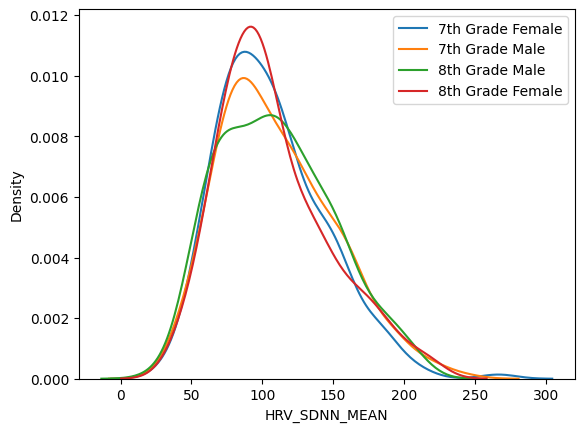

In [104]:
# Plot KDEs with labels
sns.kdeplot(seven_grade_female['HRV_SDNN_MEAN'], label='7th Grade Female')
sns.kdeplot(seven_grade_male['HRV_SDNN_MEAN'], label='7th Grade Male')
sns.kdeplot(eight_grade_male['HRV_SDNN_MEAN'], label='8th Grade Male')
sns.kdeplot(eight_grade_female['HRV_SDNN_MEAN'], label='8th Grade Female')

# Add legend
plt.legend()

# Show the plot
plt.show()



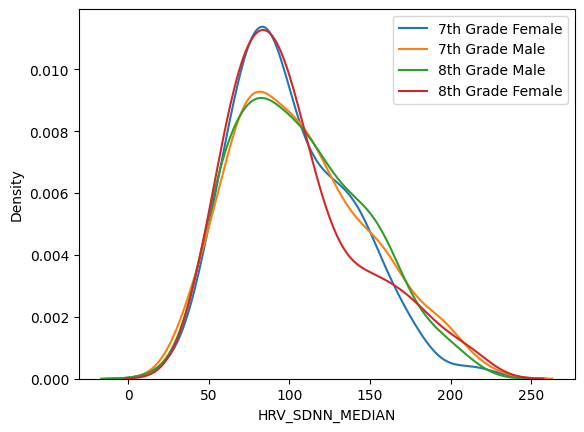

In [105]:
sns.kdeplot(seven_grade_female['HRV_SDNN_MEDIAN'], label='7th Grade Female')
sns.kdeplot(seven_grade_male['HRV_SDNN_MEDIAN'], label='7th Grade Male')
sns.kdeplot(eight_grade_male['HRV_SDNN_MEDIAN'], label='8th Grade Male')
sns.kdeplot(eight_grade_female['HRV_SDNN_MEDIAN'], label='8th Grade Female')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [106]:
# Calculate medians
median_7f = seven_grade_female['HRV_SDNN_MEDIAN'].mean()
median_7m = seven_grade_male['HRV_SDNN_MEDIAN'].mean()
median_8m = eight_grade_male['HRV_SDNN_MEDIAN'].mean()
median_8f = eight_grade_female['HRV_SDNN_MEDIAN'].mean()

# Print the median values
print("Median 7th Grade Female:", median_7f)
print("Median 7th Grade Male:", median_7m)
print("Median 8th Grade Male:",
       median_8m)
print("Median 8th Grade Female:", median_8f)


Median 7th Grade Female: 101.62515724524368
Median 7th Grade Male: 107.1174770405075
Median 8th Grade Male: 106.42639753047354
Median 8th Grade Female: 102.97082697142417


In [107]:
# Calculate means
mean_7f = seven_grade_female['HRV_SDNN_MEAN'].mean()
mean_7m = seven_grade_male['HRV_SDNN_MEAN'].mean()
mean_8m = eight_grade_male['HRV_SDNN_MEAN'].mean()
mean_8f = eight_grade_female['HRV_SDNN_MEAN'].mean()

# Print the mean values
print("Mean 7th Grade Female:", mean_7f)
print("Mean 7th Grade Male:", mean_7m)
print("Mean 8th Grade Male:", mean_8m)
print("Mean 8th Grade Female:", mean_8f)

Mean 7th Grade Female: 106.47750036648245
Mean 7th Grade Male: 110.62074293778544
Mean 8th Grade Male: 109.99313601109498
Mean 8th Grade Female: 107.98444733844676


C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\3647927273.py:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(ages, hrv_sdnn_median, degree)


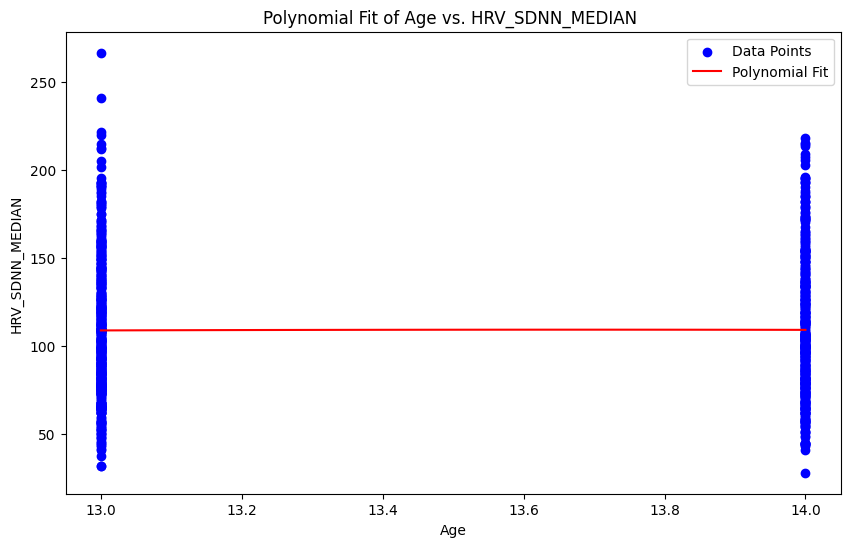

In [108]:
# Polynamial Fit for different age people
# Extract age and HRV_SDNN_MEDIAN
ages = middle_school_final_SDNN['age'].values
hrv_sdnn_median = middle_school_final_SDNN['HRV_SDNN_MEAN'].values

# Fit a polynomial of degree 2
degree = 5
coefficients = np.polyfit(ages, hrv_sdnn_median, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(ages), max(ages), 100)
y_values = polynomial(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(ages, hrv_sdnn_median, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('HRV_SDNN_MEDIAN')
plt.title('Polynomial Fit of Age vs. HRV_SDNN_MEDIAN ')
plt.legend()
plt.show()


### Giving The Estimated Value for HRV_SDNN_MEDIAN_ESTIMATED:

The value of 104 is given as it is median for all seven grade and eight grade male and female students

In [31]:
median_of_middle_school = middle_school_final_SDNN['HRV_SDNN_MEDIAN'].mean()
mean_of_middle_school = middle_school_final_SDNN['HRV_SDNN_MEAN'].mean()
standard_deviation_middle_school = middle_school_final_SDNN['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_middle_school)
print("Standard Deviation of Middle School: ", standard_deviation_middle_school)
print("Mean of Middle School: ", mean_of_middle_school)

Median of Middle School:  104.61781509532487
Standard Deviation of Middle School:  32.58340316759286
Mean of Middle School:  108.82149346707962


In [32]:
median_of_middle_school_RMSSD = middle_school_final_RMSSD['HRV_RMSSD_MEDIAN'].mean()
mean_of_middle_school_RMSSD = middle_school_final_RMSSD['HRV_RMSSD_MEAN'].mean()
standard_deviation_middle_school_RMSSD = middle_school_final_RMSSD['HRV_RMSSD_STD'].mean()
print("Median of Middle School: ", median_of_middle_school_RMSSD)
print("Standard Deviation of Middle School: ", standard_deviation_middle_school_RMSSD)
print("Mean of Middle School: ", mean_of_middle_school_RMSSD)

Median of Middle School:  129.4580851346552
Standard Deviation of Middle School:  48.784944656001635
Mean of Middle School:  137.16198155189358


In [112]:
median_of_middle_school_PNN50 = middle_school_final_PNN50['HRV_pNN50_STD'].mean()
mean_of_middle_school_PNN50 = middle_school_final_PNN50['HRV_pNN50_MEAN'].mean()
standard_deviation_middle_school_PNN50 = middle_school_final_PNN50['HRV_pNN50_MEDIAN'].mean()
print("Median of Middle School: ", median_of_middle_school_PNN50)
print("Standard Deviation of Middle School: ", standard_deviation_middle_school_PNN50)
print("Mean of Middle School: ", mean_of_middle_school_PNN50)

Median of Middle School:  10.152219657459938
Standard Deviation of Middle School:  46.74972440825644
Mean of Middle School:  47.12419893473049


In [34]:
middle_school_final_SDNN['HRV_SDNN_MEDIAN_ESTIMATED'] = median_of_middle_school

# University Analaysis


In [64]:
university_school_final_SDNN = group_function(university_school, 'HRV_SDNN')
university_school_final_SDNN['gender'] = university_school_final_SDNN['gender'].apply(lambda x: 1 if x == 'Male' else 0)
university_school_final_SDNN = outlier_removal(university_school_final_SDNN, feature= 'HRV_SDNN_MEDIAN')

university_school_final_RMSSD = group_function(university_school, 'HRV_RMSSD')
university_school_final_RMSSD['gender'] = university_school_final_RMSSD['gender'].apply(lambda x: 1 if x == 'Male' else 0)
university_school_final_RMSSD = outlier_removal(university_school_final_RMSSD, feature= 'HRV_RMSSD_MEDIAN')

university_school_final_PNN50 = group_function(university_school, 'HRV_pNN50')
university_school_final_PNN50['gender'] = university_school_final_PNN50['gender'].apply(lambda x: 1 if x == 'Male' else 0)
university_school_final_PNN50 = outlier_removal(university_school_final_PNN50, feature = 'HRV_pNN50_MEDIAN')

Text(0, 0.5, 'Subject Count')

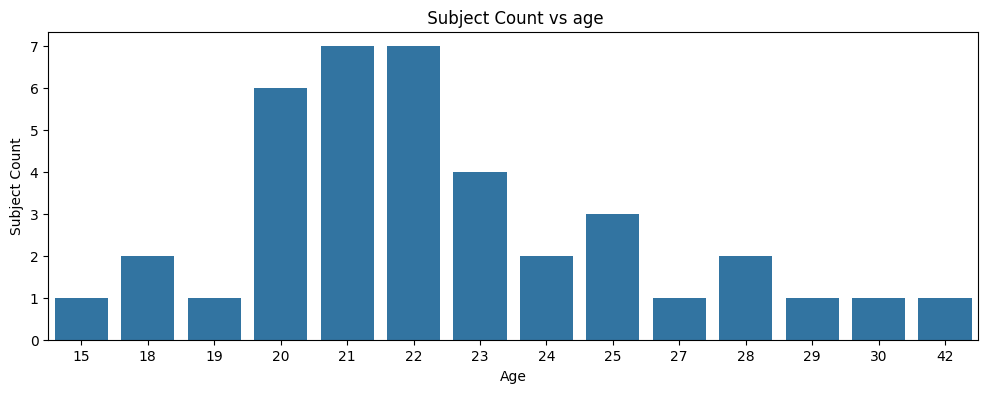

In [66]:
age_dist = university_school_final_SDNN['age'].value_counts()
plt.figure(figsize= (12,4))
sns.barplot(age_dist)
plt.title(" Subject Count vs age")
plt.xlabel("Age")
plt.ylabel("Subject Count")


In [68]:
uni_student_21_less =  university_school_final_SDNN[university_school_final_SDNN['age'] <= 21]
uni_student_21_24 =  university_school_final_SDNN[(university_school_final_SDNN['age'] > 21) & (university_school_final_SDNN['age'] < 24)]
uni_student_24_greater =  university_school_final_SDNN[university_school_final_SDNN['age'] >= 24]

uni_student_20_less =  university_school_final_SDNN[university_school_final_SDNN['age'] <= 20]
uni_student_20 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 20]
uni_student_21 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 21]
uni_student_22 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 22]
uni_student_23 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 23]
uni_student_24 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 24]
uni_student_25 =  university_school_final_SDNN[university_school_final_SDNN['age'] == 25]
uni_student_greater_25 =  university_school_final_SDNN[university_school_final_SDNN['age'] > 25]
print("University Students less than 20 subject count: {}\nUniversity Students less betweem 21-24 subject count: {}\nUniversity Students greater than 24 subject count: {} ".format(len(uni_student_21_less), len(uni_student_21_24), len(uni_student_24_greater)))

University Students less than 20 subject count: 17
University Students less betweem 21-24 subject count: 11
University Students greater than 24 subject count: 11 


In [69]:
# Split the data by gender for each age range

# Less than 20
uni_student_less_20_male = uni_student_20_less[uni_student_20_less['gender'] == 1]
uni_student_less_20_female = uni_student_20_less[uni_student_20_less['gender'] == 0]
# Age 20
uni_student_20_male = uni_student_20[uni_student_20['gender'] == 1]
uni_student_20_female = uni_student_20[uni_student_20['gender'] == 0]
# Age 21
uni_student_21_male = uni_student_21[uni_student_21['gender'] == 1]
uni_student_21_female = uni_student_21[uni_student_21['gender'] == 0]
# Age 22
uni_student_22_male = uni_student_22[uni_student_22['gender'] == 1]
uni_student_22_female = uni_student_22[uni_student_22['gender'] == 0]
# Age 23
uni_student_23_male = uni_student_23[uni_student_23['gender'] == 1]
uni_student_23_female = uni_student_23[uni_student_23['gender'] == 0]
# Age 24
uni_student_24_male = uni_student_24[uni_student_24['gender'] == 1]
uni_student_24_female = uni_student_24[uni_student_24['gender'] == 0]
# Age 25
uni_student_25_male = uni_student_25[uni_student_25['gender'] == 1]
uni_student_25_female = uni_student_25[uni_student_25['gender'] == 0]
# Greater than 25
uni_student_greater_25_male = uni_student_greater_25[uni_student_greater_25['gender'] == 1]
uni_student_greater_25_female = uni_student_greater_25[uni_student_greater_25['gender'] == 0]

# Print the number of entries for each group
print(f"Less than 20 - Males: {len(uni_student_less_20_male)}, Females: {len(uni_student_less_20_female)}")
print(f"Age 20 - Males: {len(uni_student_20_male)}, Females: {len(uni_student_20_female)}")
print(f"Age 21 - Males: {len(uni_student_21_male)}, Females: {len(uni_student_21_female)}")
print(f"Age 22 - Males: {len(uni_student_22_male)}, Females: {len(uni_student_22_female)}")
print(f"Age 23 - Males: {len(uni_student_23_male)}, Females: {len(uni_student_23_female)}")
print(f"Age 24 - Males: {len(uni_student_24_male)}, Females: {len(uni_student_24_female)}")
print(f"Age 25 - Males: {len(uni_student_25_male)}, Females: {len(uni_student_25_female)}")
print(f"Greater than 25 - Males: {len(uni_student_greater_25_male)}, Females: {len(uni_student_greater_25_female)}")


Less than 20 - Males: 3, Females: 7
Age 20 - Males: 1, Females: 5
Age 21 - Males: 3, Females: 4
Age 22 - Males: 6, Females: 1
Age 23 - Males: 3, Females: 1
Age 24 - Males: 1, Females: 1
Age 25 - Males: 0, Females: 3
Greater than 25 - Males: 4, Females: 2


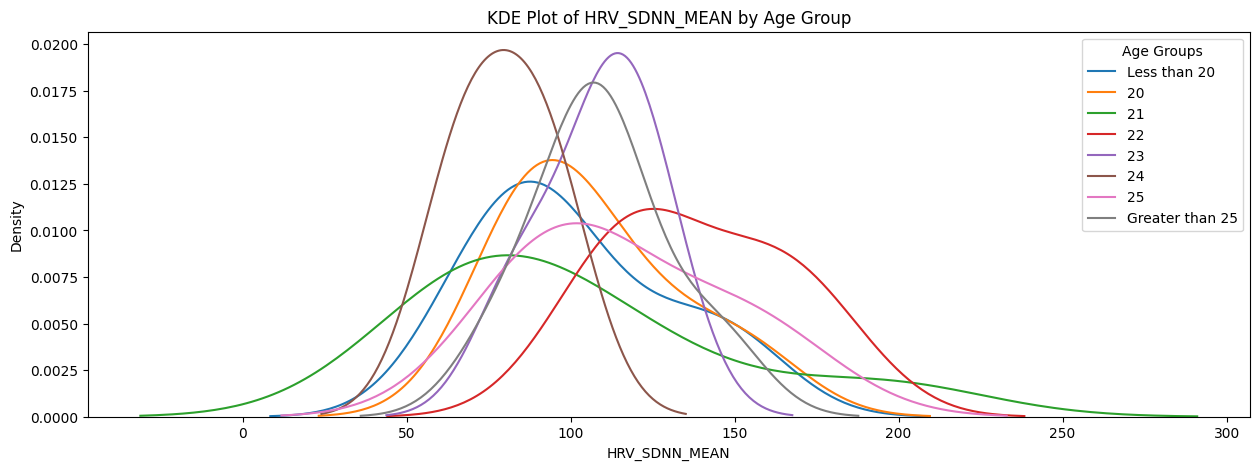

In [70]:
# Overall Combined Males and Females with different ages ( MEAN PLOT)
plt.figure(figsize=(15, 5))
sns.kdeplot(uni_student_20_less['HRV_SDNN_MEAN'], label='Less than 20')
sns.kdeplot(uni_student_20['HRV_SDNN_MEAN'], label='20')
sns.kdeplot(uni_student_21['HRV_SDNN_MEAN'], label='21')
sns.kdeplot(uni_student_22['HRV_SDNN_MEAN'], label='22')
sns.kdeplot(uni_student_23['HRV_SDNN_MEAN'], label='23')
sns.kdeplot(uni_student_24['HRV_SDNN_MEAN'], label='24')
sns.kdeplot(uni_student_25['HRV_SDNN_MEAN'], label='25')
sns.kdeplot(uni_student_greater_25['HRV_SDNN_MEAN'], label='Greater than 25')
plt.legend(title='Age Groups')
plt.xlabel('HRV_SDNN_MEAN')
plt.ylabel('Density')
plt.title('KDE Plot of HRV_SDNN_MEAN by Age Group')

# Show plot
plt.show()


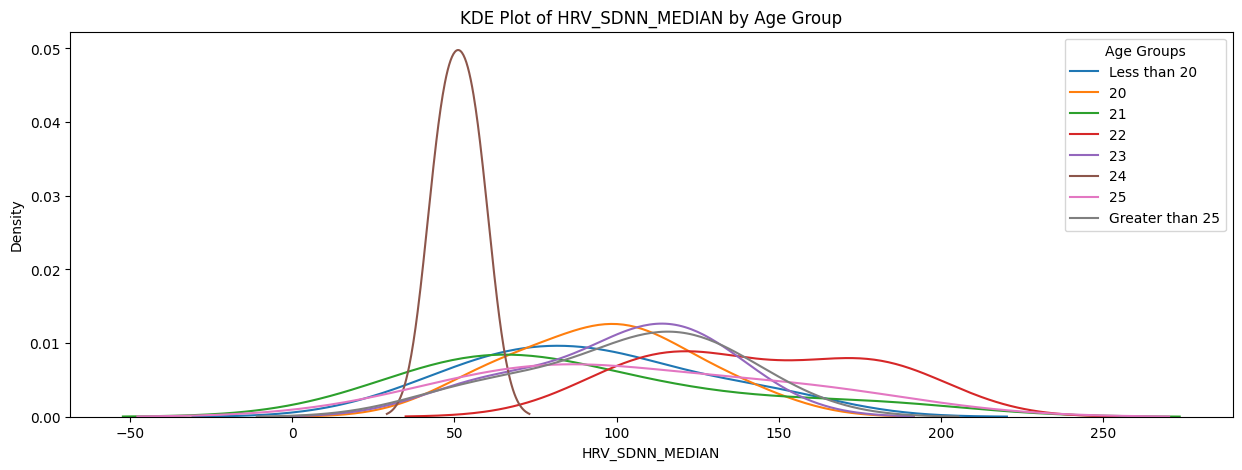

In [71]:

plt.figure(figsize=(15, 5))
sns.kdeplot(uni_student_20_less['HRV_SDNN_MEDIAN'], label='Less than 20')
sns.kdeplot(uni_student_20['HRV_SDNN_MEDIAN'], label='20')
sns.kdeplot(uni_student_21['HRV_SDNN_MEDIAN'], label='21')
sns.kdeplot(uni_student_22['HRV_SDNN_MEDIAN'], label='22')
sns.kdeplot(uni_student_23['HRV_SDNN_MEDIAN'], label='23')
sns.kdeplot(uni_student_24['HRV_SDNN_MEDIAN'], label='24')
sns.kdeplot(uni_student_25['HRV_SDNN_MEDIAN'], label='25')
sns.kdeplot(uni_student_greater_25['HRV_SDNN_MEDIAN'], label='Greater than 25')
plt.legend(title='Age Groups')
plt.xlabel('HRV_SDNN_MEDIAN')
plt.ylabel('Density')
plt.title('KDE Plot of HRV_SDNN_MEDIAN by Age Group')

# Show plot
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\2922842041.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(uni_student_20_male['HRV_SDNN_MEAN'], label='20', color='green')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\2922842041.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(uni_student_24_male['HRV_SDNN_MEAN'], label='24', color='pink')


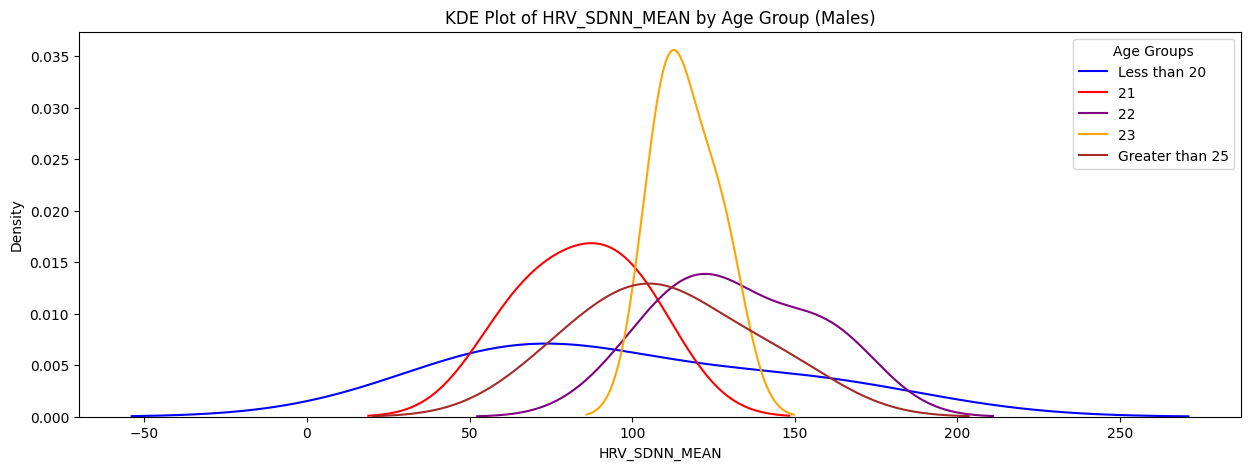

In [72]:
# KDE plots for males
plt.figure(figsize=(15, 5))
sns.kdeplot(uni_student_less_20_male['HRV_SDNN_MEAN'], label='Less than 20', color='blue')
sns.kdeplot(uni_student_20_male['HRV_SDNN_MEAN'], label='20', color='green')
sns.kdeplot(uni_student_21_male['HRV_SDNN_MEAN'], label='21', color='red')
sns.kdeplot(uni_student_22_male['HRV_SDNN_MEAN'], label='22', color='purple')
sns.kdeplot(uni_student_23_male['HRV_SDNN_MEAN'], label='23', color='orange')
sns.kdeplot(uni_student_24_male['HRV_SDNN_MEAN'], label='24', color='pink')
sns.kdeplot(uni_student_25_male['HRV_SDNN_MEAN'], label='25', color='cyan')
sns.kdeplot(uni_student_greater_25_male['HRV_SDNN_MEAN'], label='Greater than 25', color='brown')

plt.legend(title='Age Groups')
plt.xlabel('HRV_SDNN_MEAN')
plt.ylabel('Density')
plt.title('KDE Plot of HRV_SDNN_MEAN by Age Group (Males)')

# Show plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\2830949112.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(uni_student_22_female['HRV_SDNN_MEAN'], label='22', color='purple')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\2830949112.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(uni_student_23_female['HRV_SDNN_MEAN'], label='23', color='orange')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28828\2830949112.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(uni_student_24_female['HRV_SDNN_MEAN'], label='24', color='pink')


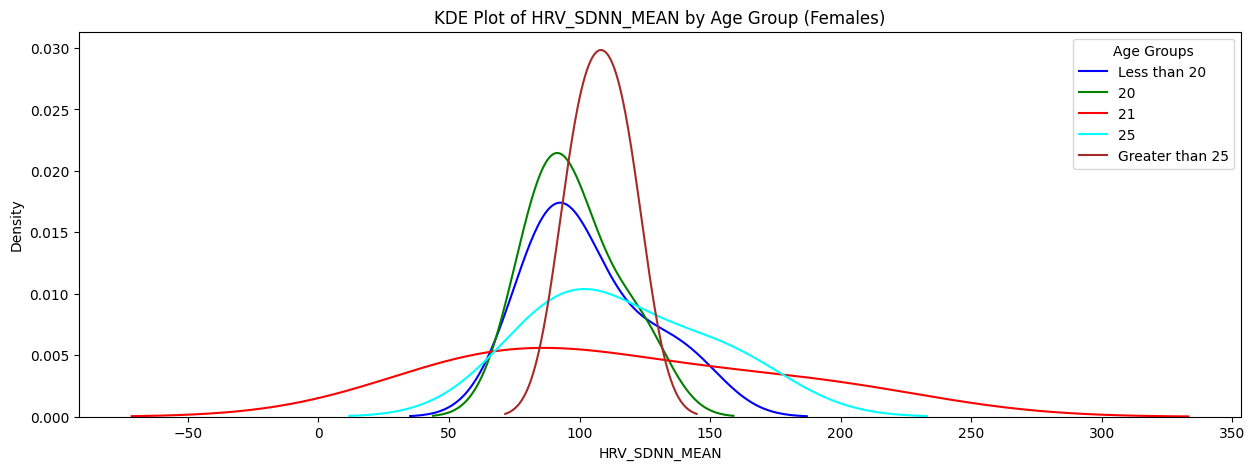

In [73]:
# KDE plots for females
plt.figure(figsize=(15, 5))
sns.kdeplot(uni_student_less_20_female['HRV_SDNN_MEAN'], label='Less than 20', color='blue')
sns.kdeplot(uni_student_20_female['HRV_SDNN_MEAN'], label='20', color='green')
sns.kdeplot(uni_student_21_female['HRV_SDNN_MEAN'], label='21', color='red')
sns.kdeplot(uni_student_22_female['HRV_SDNN_MEAN'], label='22', color='purple')
sns.kdeplot(uni_student_23_female['HRV_SDNN_MEAN'], label='23', color='orange')
sns.kdeplot(uni_student_24_female['HRV_SDNN_MEAN'], label='24', color='pink')
sns.kdeplot(uni_student_25_female['HRV_SDNN_MEAN'], label='25', color='cyan')
sns.kdeplot(uni_student_greater_25_female['HRV_SDNN_MEAN'], label='Greater than 25', color='brown')

plt.legend(title='Age Groups')
plt.xlabel('HRV_SDNN_MEAN')
plt.ylabel('Density')
plt.title('KDE Plot of HRV_SDNN_MEAN by Age Group (Females)')

# Show plot
plt.show()


In [74]:
import pandas as pd

# Define a function to calculate mean, median, and standard deviation
def calculate_stats(df, group_name):
    mean_val = df['HRV_SDNN_MEAN'].mean()
    median_val = df['HRV_SDNN_MEDIAN'].mean()
    std_val = df['HRV_SDNN_MEAN'].std()
    return mean_val, median_val, std_val

# Create a list of age groups and their corresponding dataframes
age_groups = [
    ('less than 21', uni_student_21_less),
    ('uni_student_21_24', uni_student_21_24),
    ('uni_student_24', uni_student_24_greater),
    ('20', uni_student_20),
    ('21', uni_student_21),
    ('22', uni_student_22),
    ('23', uni_student_23),
    ('24', uni_student_24),
    ('25', uni_student_25),
    ('Greater than 25', uni_student_greater_25)
]

# Initialize lists to store results
results = []

# Calculate statistics for each group and store the results
for group_name, df in age_groups:
    mean_val, median_val, std_val = calculate_stats(df, group_name)
    results.append((group_name, mean_val, median_val, std_val))

# Print the results in a tabular format
print(f"{'Age Group':<20} {'Mean':<10} {'Median':<10} {'Std Dev':<10}")
print("="*50)
for group_name, mean_val, median_val, std_val in results:
    print(f"{group_name:<20} {mean_val:<10.2f} {median_val:<10.2f} {std_val:<10.2f}")


Age Group            Mean       Median     Std Dev   
less than 21         101.32     89.47      36.34     
uni_student_21_24    127.98     128.72     28.51     
uni_student_24       105.82     94.42      25.34     
20                   106.84     95.74      27.00     
21                   101.45     87.80      47.12     
22                   139.11     144.24     28.25     
23                   108.51     101.57     17.84     
24                   79.57      51.13      16.73     
25                   116.29     104.86     32.95     
Greater than 25      109.34     103.62     20.92     


In [89]:
def dividing_uni_student(university_school_final):
    uni_student_21_less =  university_school_final[university_school_final['age'] <= 21]
    uni_student_21_24 =  university_school_final[(university_school_final['age'] > 21) & (university_school_final['age'] < 24)]
    uni_student_24_greater =  university_school_final[university_school_final['age'] >= 24]
    return uni_student_21_less, uni_student_21_24, uni_student_24_greater

In [90]:
uni_student_21_less, uni_student_21_24, uni_student_24_greater = dividing_uni_student(university_school_final_SDNN)
# SDNN
print(20 * '*'.center(1) + "SDNN_LESS_THAN_21" + 20 * '*'.center(1))
median_of_university_school_21_less = uni_student_21_less['HRV_SDNN_MEDIAN'].mean()
mean_of_university_school_21_less = uni_student_21_less['HRV_SDNN_MEAN'].mean()
standard_deviation_university_school_21_less = uni_student_21_less['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_university_school_21_less)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_21_less)
print("Mean of Middle School: ", mean_of_university_school_21_less)


# SDNN
print(20 * '*'.center(1) + "SDNN_21_24" + 20 * '*'.center(1))
median_of_university_school_21_24 = uni_student_21_24['HRV_SDNN_MEDIAN'].mean()
mean_of_university_school_21_24 = uni_student_21_24['HRV_SDNN_MEAN'].mean()
standard_deviation_university_school_21_24 = uni_student_21_24['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_university_school_21_24)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_21_24)
print("Mean of Middle School: ", mean_of_university_school_21_24)


# SDNN
print(20 * '*'.center(1) + "SDNN_GREATER THAN 24" + 20 * '*'.center(1))
median_of_university_school_24_greater = uni_student_24_greater['HRV_SDNN_MEDIAN'].mean()
mean_of_university_school_24_greater = uni_student_24_greater['HRV_SDNN_MEAN'].mean()
standard_deviation_university_school_24_greater = uni_student_24_greater['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_university_school_24_greater)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_24_greater)
print("Mean of Middle School: ", mean_of_university_school_24_greater)



********************SDNN_LESS_THAN_21********************
Median of Middle School:  89.47111845735924
Standard Deviation of Middle School:  57.452824577207814
Mean of Middle School:  101.3236103688113
********************SDNN_21_24********************
Median of Middle School:  128.72287721932182
Standard Deviation of Middle School:  51.83077827073252
Mean of Middle School:  127.98440885787537
********************SDNN_GREATER THAN 24********************
Median of Middle School:  94.41671144099396
Standard Deviation of Middle School:  64.26264337007446
Mean of Middle School:  105.8212183198014


In [93]:
uni_student_21_less, uni_student_21_24, uni_student_24_greater = dividing_uni_student(university_school_final_RMSSD)
# RMSSD
print(20 * '*'.center(1) + "RMSSD" + 20 * '*'.center(1))
median_of_university_school_RMSSD_21_less = uni_student_21_less['HRV_RMSSD_MEDIAN'].mean()
mean_of_university_school_RMSSD_21_less = uni_student_21_less['HRV_RMSSD_MEAN'].mean()
standard_deviation_university_school_RMSSD_21_less = uni_student_21_less['HRV_RMSSD_STD'].mean()
print("Median of Middle School: ", median_of_university_school_RMSSD_21_less)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_RMSSD_21_less)
print("Mean of Middle School: ", mean_of_university_school_RMSSD_21_less)

# RMSSD
print(20 * '*'.center(1) + "RMSSD" + 20 * '*'.center(1))
median_of_university_school_RMSSD = uni_student_21_24['HRV_RMSSD_MEDIAN'].mean()
mean_of_university_school_RMSSD = uni_student_21_24['HRV_RMSSD_MEAN'].mean()
standard_deviation_university_school_RMSSD = uni_student_21_24['HRV_RMSSD_STD'].mean()
print("Median of Middle School: ", median_of_university_school_RMSSD)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_RMSSD)
print("Mean of Middle School: ", mean_of_university_school_RMSSD)

# RMSSD
print(20 * '*'.center(1) + "RMSSD" + 20 * '*'.center(1))
median_of_university_school_RMSSD_24_greater = uni_student_24_greater['HRV_RMSSD_MEDIAN'].mean()
mean_of_university_school_RMSSD_24_greater = uni_student_24_greater['HRV_RMSSD_MEAN'].mean()
standard_deviation_university_school_RMSSD_24_greater = uni_student_24_greater['HRV_RMSSD_STD'].mean()
print("Median of Middle School: ", median_of_university_school_RMSSD_24_greater)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_RMSSD_24_greater)
print("Mean of Middle School: ", mean_of_university_school_RMSSD_24_greater)



********************RMSSD********************
Median of Middle School:  115.64747379498054
Standard Deviation of Middle School:  83.186467661856
Mean of Middle School:  134.49062078382144
********************RMSSD********************
Median of Middle School:  164.32619657920267
Standard Deviation of Middle School:  79.12230022233958
Mean of Middle School:  168.09326830246627
********************RMSSD********************
Median of Middle School:  122.27757499307592
Standard Deviation of Middle School:  90.56560037891646
Mean of Middle School:  140.06455962498217


In [85]:
uni_student_21_less, uni_student_21_24, uni_student_24_greater = dividing_uni_student(university_school_final_PNN50)
# pNN50
print(20 * '*'.center(1) + "pNN50" + 20 * '*'.center(1))
median_of_university_school_PNN50_21_less = uni_student_21_less['HRV_pNN50_STD'].mean()
mean_of_university_school_PNN50_21_less = uni_student_21_less['HRV_pNN50_MEAN'].mean()
standard_deviation_university_school_PNN50_21_less = uni_student_21_less['HRV_pNN50_MEDIAN'].mean()
print("Median of Middle School: ", median_of_university_school_PNN50_21_less)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_PNN50_21_less)
print("Mean of Middle School: ", mean_of_university_school_PNN50_21_less)

# pNN50
print(20 * '*'.center(1) + "pNN50" + 20 * '*'.center(1))
median_of_university_school_PNN50_21_24 = uni_student_21_24['HRV_pNN50_STD'].mean()
mean_of_university_school_PNN50_21_24 = uni_student_21_24['HRV_pNN50_MEAN'].mean()
standard_deviation_university_school_PNN50_21_24 = uni_student_21_24['HRV_pNN50_MEDIAN'].mean()
print("Median of Middle School: ", median_of_university_school_PNN50_21_24)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_PNN50_21_24)
print("Mean of Middle School: ", mean_of_university_school_PNN50_21_24)

# pNN50
print(20 * '*'.center(1) + "pNN50" + 20 * '*'.center(1))
median_of_university_school_PNN50_24_greater = uni_student_24_greater['HRV_pNN50_STD'].mean()
mean_of_university_school_PNN50_24_greater = uni_student_24_greater['HRV_pNN50_MEAN'].mean()
standard_deviation_university_school_PNN50_24_greater = uni_student_24_greater['HRV_pNN50_MEDIAN'].mean()
print("Median of Middle School: ", median_of_university_school_PNN50_24_greater)
print("Standard Deviation of Middle School: ", standard_deviation_university_school_PNN50_24_greater)
print("Mean of Middle School: ", mean_of_university_school_PNN50_24_greater)

********************pNN50********************
Median of Middle School:  17.143587583508236
Standard Deviation of Middle School:  40.608613921601005
Mean of Middle School:  41.12720670033123
********************pNN50********************
Median of Middle School:  17.08883880470956
Standard Deviation of Middle School:  54.09910070286267
Mean of Middle School:  52.64919201327902
********************pNN50********************
Median of Middle School:  21.2962132314976
Standard Deviation of Middle School:  42.964221414427755
Mean of Middle School:  43.56016131773467


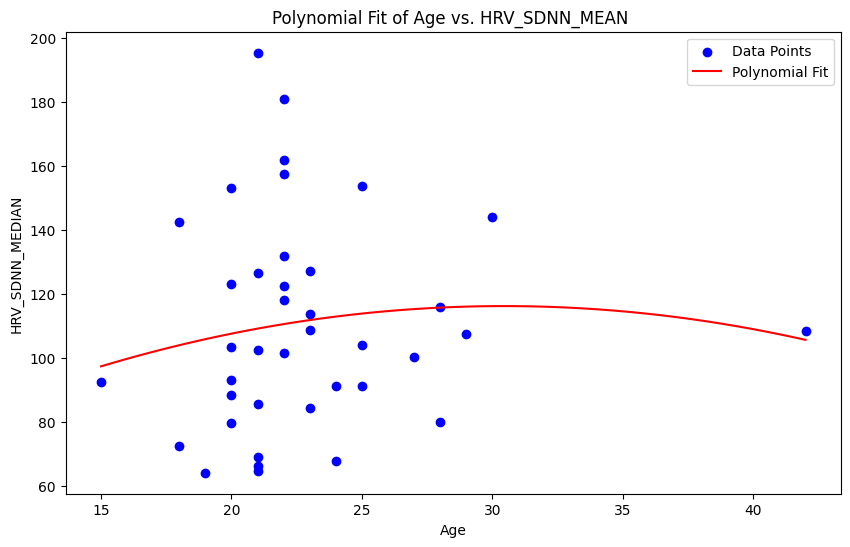

In [92]:
# Polynamial Fit for different age people
uni_student_less_30 =  university_school_final_SDNN[(university_school_final_SDNN['age'] <= 30) & (university_school_final_SDNN['age'] > 18)]

# Extract age and HRV_SDNN_MEDIAN
ages = university_school_final_SDNN['age'].values
hrv_sdnn_median = university_school_final_SDNN['HRV_SDNN_MEAN'].values

# Fit a polynomial of degree 2
degree = 2
coefficients = np.polyfit(ages, hrv_sdnn_median, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(ages), max(ages), 100)
y_values = polynomial(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(ages, hrv_sdnn_median, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('HRV_SDNN_MEDIAN')
plt.title('Polynomial Fit of Age vs. HRV_SDNN_MEAN ')
plt.legend()
plt.show()


### Assigning Estimated HRV_SDNN Value to subjects

In [94]:
uni_student_21_less =  university_school_final_SDNN[university_school_final_SDNN['age'] <= 21]
uni_student_21_24 =  university_school_final_SDNN[(university_school_final_SDNN['age'] > 21) & (university_school_final_SDNN['age'] < 24)]
uni_student_24_greater =  university_school_final_SDNN[university_school_final_SDNN['age'] >= 24]

In [95]:
#uni_student_21_less
median_of_uni = uni_student_21_less['HRV_SDNN_MEDIAN'].mean()
mean_of_uni = uni_student_21_less['HRV_SDNN_MEAN'].mean()
standard_deviation_uni = uni_student_21_less['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_uni)
print("Standard Deviation of Middle School: ", standard_deviation_uni)
print("Mean of Middle School: ", mean_of_uni)

Median of Middle School:  89.47111845735924
Standard Deviation of Middle School:  57.452824577207814
Mean of Middle School:  101.3236103688113


In [96]:
#uni_student_21_24
median_of_uni = uni_student_21_24['HRV_SDNN_MEDIAN'].mean()
mean_of_uni = uni_student_21_24['HRV_SDNN_MEAN'].mean()
standard_deviation_uni = uni_student_21_24['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_uni)
print("Standard Deviation of Middle School: ", standard_deviation_uni)
print("Mean of Middle School: ", mean_of_uni)

Median of Middle School:  128.72287721932182
Standard Deviation of Middle School:  51.83077827073252
Mean of Middle School:  127.98440885787537


In [97]:
#uni_student_24_greater
median_of_uni = uni_student_24_greater['HRV_SDNN_MEDIAN'].mean()
mean_of_uni = uni_student_24_greater['HRV_SDNN_MEAN'].mean()
standard_deviation_uni = uni_student_24_greater['HRV_SDNN_STD'].mean()
print("Median of Middle School: ", median_of_uni)
print("Standard Deviation of Middle School: ", standard_deviation_uni)
print("Mean of Middle School: ", mean_of_uni)

Median of Middle School:  94.41671144099396
Standard Deviation of Middle School:  64.26264337007446
Mean of Middle School:  105.8212183198014


In [98]:
def assign_hrv_sdnn_estimated(age):
    if age <= 21:
        return university_school_final_SDNN[university_school_final_SDNN['age'] <= 21]['HRV_SDNN_MEDIAN'].mean()
    elif 21 < age < 24:
        return university_school_final_SDNN[(university_school_final_SDNN['age'] > 21) & (university_school_final_SDNN['age'] < 24)]['HRV_SDNN_MEDIAN'].mean()
    else:
        return university_school_final_SDNN[university_school_final_SDNN['age'] >= 24]['HRV_SDNN_MEDIAN'].mean()

# Apply the function to create the new column
university_school_final_SDNN['HRV_SDNN_MEDIAN_ESTIMATED'] = university_school_final_SDNN['age'].apply(assign_hrv_sdnn_estimated)

# Hospital Analysis

In [30]:
hospital_final = preprocess_data(hospital)
hospital_final = outlier_removal(hospital_final)

In [31]:
hospital_less_less_30 =  hospital_final[hospital_final['age'] < 30]
hospital_30_40 =  hospital_final[(hospital_final['age'] >= 30) & (hospital_final['age'] < 40)]
hospital_plus_40 =  hospital_final[hospital_final['age'] >= 40]


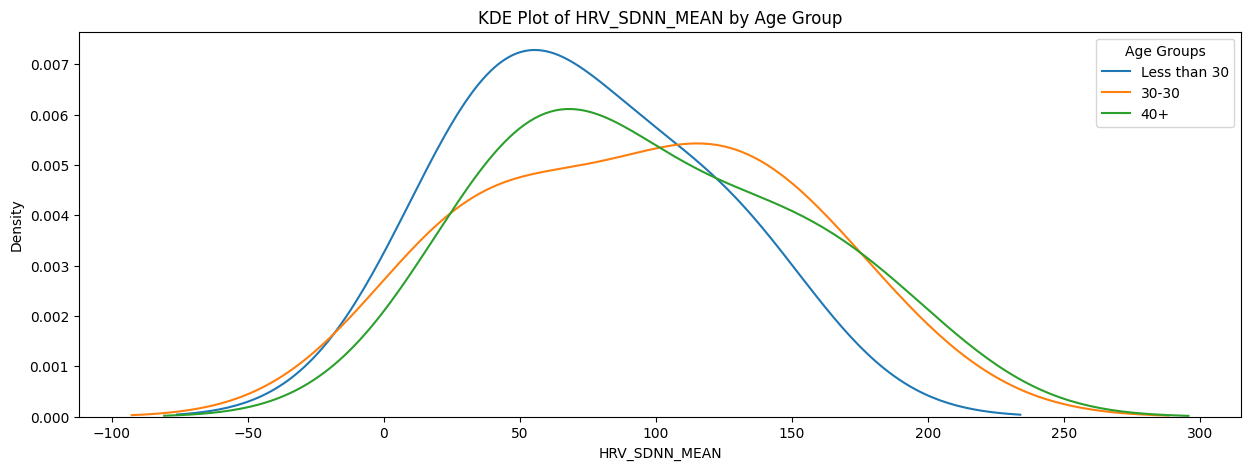

In [32]:
# Overall Combined Males and Females with different ages ( MEAN PLOT)
plt.figure(figsize=(15, 5))
sns.kdeplot(hospital_less_less_30['HRV_SDNN_MEDIAN'], label='Less than 30')
sns.kdeplot(hospital_30_40['HRV_SDNN_MEDIAN'], label='30-30')
sns.kdeplot(hospital_plus_40['HRV_SDNN_MEDIAN'], label='40+')
plt.legend(title='Age Groups')
plt.xlabel('HRV_SDNN_MEAN')
plt.ylabel('Density')
plt.title('KDE Plot of HRV_SDNN_MEAN by Age Group')

# Show plot
plt.show()


In [33]:
import pandas as pd

# Define a function to calculate mean, median, and standard deviation
def calculate_stats(df, group_name):
    mean_val = df['HRV_SDNN_MEAN'].mean()
    median_val = df['HRV_SDNN_MEDIAN'].mean()
    std_val = df['HRV_SDNN_MEAN'].std()
    return mean_val, median_val, std_val

# Create a list of age groups and their corresponding dataframes
age_groups = [
    ('<30', hospital_less_less_30),
    ('30-40', hospital_30_40),
    ('40+', hospital_plus_40)
]

# Initialize lists to store results
results = []

# Calculate statistics for each group and store the results
for group_name, df in age_groups:
    mean_val, median_val, std_val = calculate_stats(df, group_name)
    results.append((group_name, mean_val, median_val, std_val))

# Print the results in a tabular format
print(f"{'Age Group':<20} {'Mean':<10} {'Median':<10} {'Std Dev':<10}")
print("="*50)
for group_name, mean_val, median_val, std_val in results:
    print(f"{group_name:<20} {mean_val:<10.2f} {median_val:<10.2f} {std_val:<10.2f}")


Age Group            Mean       Median     Std Dev   
<30                  77.93      73.09      42.25     
30-40                100.82     93.77      45.91     
40+                  107.92     97.43      45.72     


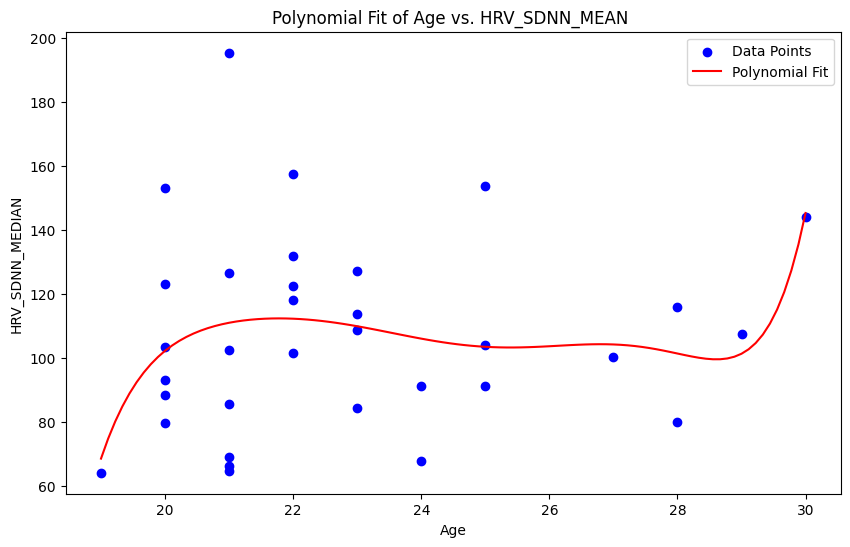

In [34]:
# Polynamial Fit for different age people

uni_student_less_30 =  university_school_final_SDNN[(university_school_final_SDNN['age'] <= 30) & (university_school_final_SDNN['age'] > 18)]

# Extract age and HRV_SDNN_MEDIAN
ages = uni_student_less_30['age'].values
hrv_sdnn_median = uni_student_less_30['HRV_SDNN_MEAN'].values

# Fit a polynomial of degree 2
degree = 7
coefficients = np.polyfit(ages, hrv_sdnn_median, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(ages), max(ages), 100)
y_values = polynomial(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(ages, hrv_sdnn_median, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('HRV_SDNN_MEDIAN')
plt.title('Polynomial Fit of Age vs. HRV_SDNN_MEAN ')
plt.legend()
plt.show()


# Combine All analysis

In [35]:
combined_data = pd.concat([middle_school_final_SDNN,university_school_final_SDNN])
combined_data =  combined_data[(combined_data['age'] <= 30)]

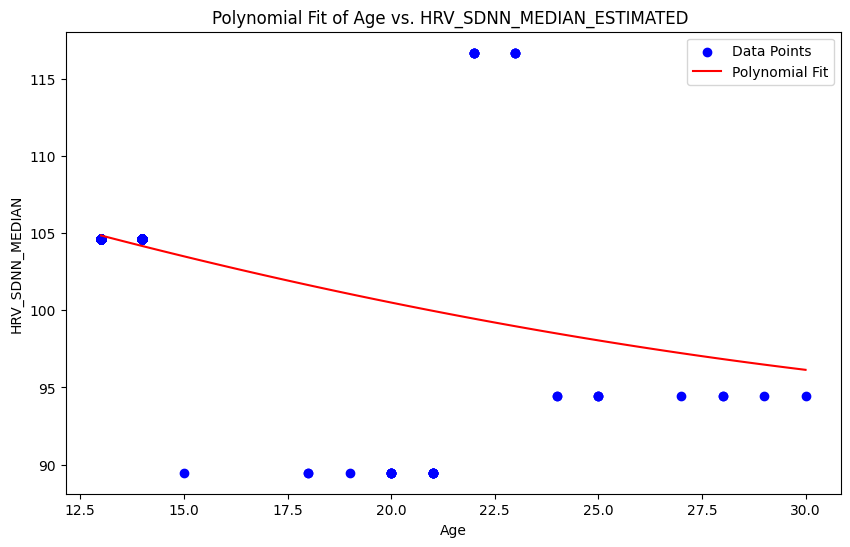

In [37]:
# Polynamial Fit for different age people
# Extract age and HRV_SDNN_MEDIAN
ages = combined_data['age'].values
hrv_sdnn_median = combined_data['HRV_SDNN_MEDIAN_ESTIMATED'].values

# Fit a polynomial of degree 2
degree = 2
coefficients = np.polyfit(ages, hrv_sdnn_median, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(ages), max(ages), 100)
y_values = polynomial(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(ages, hrv_sdnn_median, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('HRV_SDNN_MEDIAN')
plt.title('Polynomial Fit of Age vs. HRV_SDNN_MEDIAN_ESTIMATED ')
plt.legend()
plt.show()


Text(0.5, 1.0, 'University School - Original')

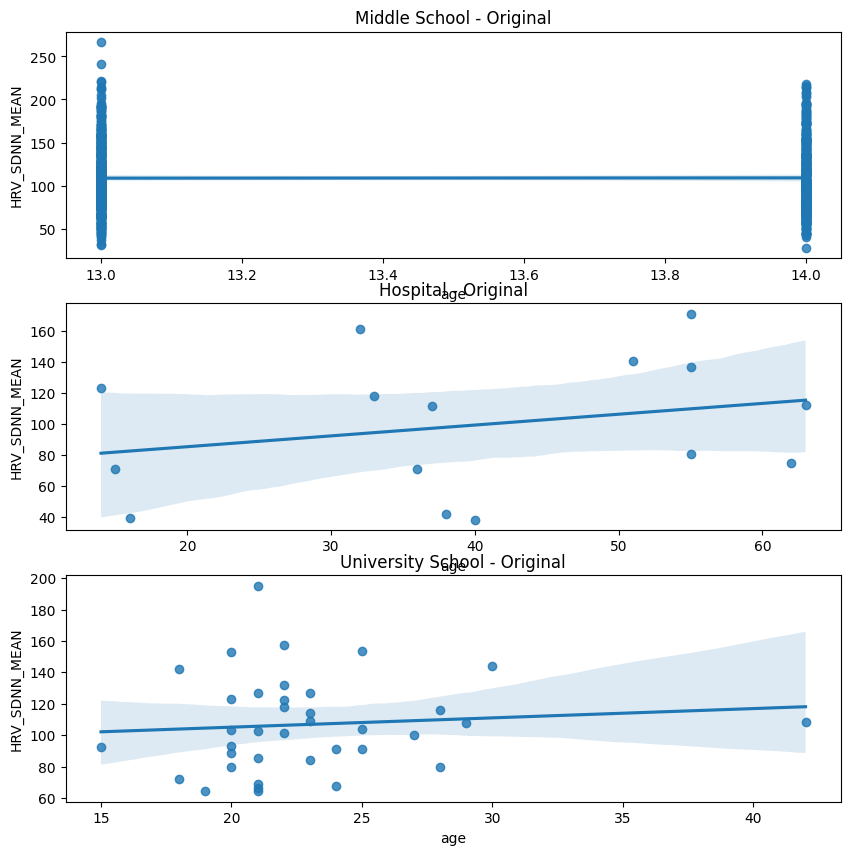

In [38]:
# Plotting
plt.figure(figsize=(10,10))

# Original HRV_SDNN_MEAN distributions
plt.subplot(3, 1, 1)
sns.regplot(middle_school_final_SDNN , x = 'age', y = 'HRV_SDNN_MEAN')

plt.title('Middle School - Original')

plt.subplot(3, 1, 2)
sns.regplot(hospital_final , x = 'age', y = 'HRV_SDNN_MEAN')

plt.title('Hospital - Original')

plt.subplot(3, 1, 3)
sns.regplot(university_school_final_SDNN , x = 'age', y = 'HRV_SDNN_MEAN')
plt.title('University School - Original')

# Saving File

In [39]:
combined_data.to_excel('./samples/filtered_data/combined_data.xlsx', index= False)

In [40]:
# middle_school_final_SDNN.to_excel('./samples/filtered_data/middle_school_final_SDNN.xlsx', index= False)
# hospital_final.to_excel('./samples/filtered_data/hospital_final.xlsx', index= False)
# university_school_final_SDNN.to_excel('./samples/filtered_data/university_school_final_SDNN.xlsx', index= False)